In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import turicreate as tc

In [132]:
v = pd.read_csv("train.csv", encoding=" ISO-8859-1")

In [133]:
df = pd.DataFrame(v)
cols = [2, 3]
df = df[df.columns[cols]]

In [165]:
data = tc.SFrame(df[0:314]) # Line 315(316 in csv changed)

In [135]:
data

selected_text,sentiment
"I`d have responded, if Iwere going ...",neutral
Sooo SAD,negative
bullying me,negative
leave me alone,negative
"Sons of ****,",negative
http://www.dothebouncy.com/smf - some shameless ...,neutral
fun,positive
Soooo high,neutral
Both of you,neutral
Wow... u just becamecooler. ...,positive


In [136]:
model = tc.logistic_classifier.create(data, target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 298

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 578

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.012058     | 1.000000          | 0.375000            |

| 1         | 5        | 5.000000  | 0.015966     | 0.996644          | 0.437500            |

| 2         | 6        | 5.000000  | 0.027364     | 1.000000          | 0.375000            |

| 3         | 7        | 5.000000  | 0.030361     | 1.000000          | 0.375000            |

| 4         | 9        | 3.292427  | 0.039284     | 1.000000          | 0.375000            |

| 9         | 17       | 2.365296  | 0.277754     | 1.000000          | 0.375000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [158]:
word = tc.SFrame({"selected_text":["I'm Okay"]})
model.predict(word)

dtype: str
Rows: 1
['neutral']

In [147]:
def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, **kwargs)
    plt.savefig("plot.png")


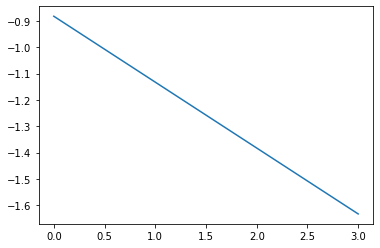

In [172]:
draw_line(1, 4, model.coefficients[0]["value"])

In [141]:
from plotly.graph_objs import Bar, Layout
from plotly import offline


In [143]:
x=[1,2,3,4,5]
y =[5,7,16,24,30]
data = [Bar(x=x, y=y)]
x_axis={"title": "Scores"}
y_axis={"title": "Numbers"}
layout = Layout(title= "Scores", xaxis= x_axis, yaxis=y_axis)
offline.plot({"data": data, "layout": layout}, filename="tempplot.html")

'tempplot.html'